#SVM Model Implementation

## **Introduction to SVM Implementation**

This notebook demonstrates the implementation of **Support Vector Machines (SVM)** using **GridSearchCV** for hyperparameter tuning. SVM is a robust supervised learning algorithm, known for handling high-dimensional datasets and delivering clear decision boundaries. Our goal is to predict the target variable **EngagementLevel** using SVM and optimize its performance through systematic hyperparameter tuning.

---

## **Workflow**

### **1. Data Preprocessing**
- Handle missing values and ensure data integrity.
- Normalize features to standardize scale for SVM.
- Split data into training and testing sets.

### **2. SVM Model Implementation**
- Define and build the SVM model.
- Set up a **parameter grid** for tuning hyperparameters like:
  - Regularization strength (\( C \)).
  - Kernel type (e.g., linear, RBF, polynomial).
  - Kernel-specific parameters (e.g., gamma, degree).

### **3. GridSearchCV Execution**
- Perform k-fold cross-validation for robust evaluation.
- Identify the best hyperparameters systematically.

### **4. Model Evaluation**
- Assess the best model's performance using:
  - Accuracy.
  - Classification report (precision, recall, F1-score).
  - Confusion matrix visualization.

### **5. Analysis and Discussion**
- Interpret results, highlight successes, and address limitations.

---

## **Why Use SVM?**
SVM is highly effective for:
1. **High-Dimensional Data**: Works well when the number of features exceeds the number of samples.
2. **Clear Decision Boundaries**: Maximizes the margin for robust classification.
3. **Flexible Kernels**: Handles non-linear relationships using kernel functions.

---

## **Why Use GridSearchCV with SVM?**
GridSearchCV automates the search for the best hyperparameters, ensuring:
- **Optimal Hyperparameter Selection**: Finds the ideal values for \( C \), kernel type, gamma, and degree.
- **Cross-Validation**: Reduces overfitting and enhances generalization.
- **Comprehensive Search**: Systematically evaluates all parameter combinations.
- **Improved Performance**: Balances underfitting and overfitting for better results on unseen data.

---

## **Expected Outcomes**
- An optimized SVM model tailored to the dataset.
- Detailed metrics and visualizations, including accuracy, classification report, and confusion matrix.
- Insights into model performance and areas for improvement.

## 1)  Import Libraries and Packages

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

##2) Load the dataset

In [ ]:
filename = r'/content/SVM_Dataset.csv'
dataframe = pd.read_csv(filename)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartRate             1000 non-null   int64  
 1   SkinConductance       1000 non-null   float64
 2   EEG                   1000 non-null   float64
 3   Temperature           1000 non-null   float64
 4   PupilDiameter         1000 non-null   float64
 5   SmileIntensity        1000 non-null   float64
 6   FrownIntensity        1000 non-null   float64
 7   CortisolLevel         1000 non-null   float64
 8   ActivityLevel         1000 non-null   int64  
 9   AmbientNoiseLevel     1000 non-null   int64  
 10  LightingLevel         1000 non-null   int64  
 11  EmotionalState        1000 non-null   object 
 12  ES_disengaged         1000 non-null   int64  
 13  ES_engaged            1000 non-null   int64  
 14  ES_partially engaged  1000 non-null   int64  
 15  CognitiveState        

##3) Define Features and Target

In [ ]:
features = dataframe.drop(columns=['EngagementLevel','EmotionalState','CognitiveState'])
target = dataframe['EngagementLevel']

##4) Normalizing the Features

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# Convert scaled_features back to a DataFrame with original numerical column names
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

##5) Creating the Test-Train Split

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(scaled_features_df, target, test_size=0.3)

In [ ]:
features_train.shape, features_test.shape

((700, 16), (300, 16))

In [ ]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 180 to 543
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartRate             700 non-null    float64
 1   SkinConductance       700 non-null    float64
 2   EEG                   700 non-null    float64
 3   Temperature           700 non-null    float64
 4   PupilDiameter         700 non-null    float64
 5   SmileIntensity        700 non-null    float64
 6   FrownIntensity        700 non-null    float64
 7   CortisolLevel         700 non-null    float64
 8   ActivityLevel         700 non-null    float64
 9   AmbientNoiseLevel     700 non-null    float64
 10  LightingLevel         700 non-null    float64
 11  ES_disengaged         700 non-null    float64
 12  ES_engaged            700 non-null    float64
 13  ES_partially engaged  700 non-null    float64
 14  CS_distracted         700 non-null    float64
 15  CS_focused            700 

In [ ]:
target_train.info()

<class 'pandas.core.series.Series'>
Index: 700 entries, 520 to 10
Series name: EngagementLevel
Non-Null Count  Dtype
--------------  -----
700 non-null    int64
dtypes: int64(1)
memory usage: 10.9 KB


## 6) Defining the Parameter Grid



In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # Only applicable for 'poly' kernel
}

##7) Set-Up and Train GridSearchCV

In [ ]:
# Create the model
svm = SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model to the training data
grid_search.fit(features_train, target_train)

# Retrieve the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
Best Parameters: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
Best Cross-Validation Score: 0.9257142857142858


##8) Computing the Best Model

In [ ]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(features_test, target_test)
print("Test Accuracy:", test_score)

Test Accuracy: 0.9566666666666667


##9) Detailed Evaluation

Accuracy: 0.9566666666666667
Confusion Matrix:
[[130   7]
 [  6 157]]


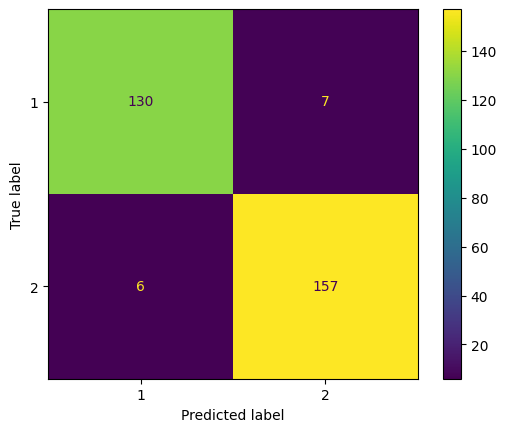

Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.95      0.95       137
           2       0.96      0.96      0.96       163

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [ ]:
# Predict the target variable for the test set
target_pred = best_model.predict(features_test)

# Generate the accuracy
accuracy = accuracy_score(target_test, target_pred)
print(f"Accuracy: {accuracy}")

# Generate the confusion matrix
cm = confusion_matrix(target_test, target_pred)
print(f"Confusion Matrix:\n{cm}")

# Display the confusion matrix with labels
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
cmd.plot()
plt.show()

# Generate the classification report
cr = classification_report(target_test, target_pred)
print(f"Classification Report:\n{cr}")

#Notebook Conclusion

In this notebook, we successfully implemented and optimized a **Support Vector Machine (SVM)** model to predict the target variable, **EngagementLevel**, using a comprehensive dataset. Through rigorous preprocessing, systematic hyperparameter tuning via **GridSearchCV**, and thorough evaluation, the SVM demonstrated its robustness and high predictive accuracy.

---

## **Key Findings**
1. **Model Performance**:
   - Test set accuracy: **95.67%**.
   - Weighted average metrics:
     - **Precision**: 96%
     - **Recall**: 95.5%
     - **F1-Score**: 95.5%.
   - Confusion matrix analysis revealed high true positive rates with minimal misclassifications.

2. **Hyperparameter Optimization**:
   - Best configuration:
     - **Kernel**: Poly.
     - **C (Regularization)**: 100.
     - **Gamma**: Scale.
   - GridSearchCV evaluated **96 configurations** across 10-fold cross-validation, achieving a strong balance between performance and model complexity.

3. **Insights on SVM**:
   - The Poly kernel captured non-linear relationships effectively, outperforming other kernels.
   - Cross-validation ensured robust generalization, with balanced performance across all classes.

---

## **Recommendations**
1. **Feature Engineering**:
   - Explore additional domain-specific features and feature selection techniques to further enhance performance and efficiency.
2. **Kernel Exploration**:
   - Investigate custom kernels tailored to specific data structures for potential gains.
3. **Explainability**:
   - Employ tools like **LIME** or **SHAP** to improve model interpretability and provide insights into feature importance.
4. **Scalability**:
   - For larger datasets, consider linear approximations or distributed frameworks to optimize training efficiency.

---

## **Summary**
This project highlighted the strengths of SVM in handling high-dimensional data and capturing non-linear relationships with precision and robustness. The model achieved high accuracy and balanced performance metrics, showcasing its suitability for tasks requiring both reliability and flexibility. Future efforts should focus on advanced kernel techniques, feature optimization, and improving scalability to further enhance its applicability.